# COGS 108 - Final Project 

# Overview

In March 2019, curfews were placed on a few select parks in San Diego in hopes to prevent night time crime. I conducted analysis on the reported crimes both before and after the curfews were imposed. I looked at differences between neighborhoods in San Diego and differences between crime rates near the parks themselves. I found that there is likely much more to the story than just placing curfews on parks. Overall the curfews had no direct impact on crime rates both on the neighborhood scale, and the local park scale.

# Name & GitHub

- Name: Bobak Tabrizi
- GitHub Username: BobTabrizi

# Research Question

Would placing a curfew on parks lower crime rates in cities of large population such as San Diego, California?

## Background and Prior Work

I came across this question last year upon attending a City Heights community meeting in early March of 2019. The question of park curfews was raised by local law enforcement and was passed around members of the community. Many saw rising crime rates as a concern, but nobody was certain on if a curfew would either help solve the problem or make it worse.

This is a question that has been brought up quite a few times by San Diegans in the past, and again this year. Law enforcement in San Diego believes in a positive outcome from a curfew. "Police say curfews can be effective at reducing crime because they limit opportunities for illegal activity and provide officers with another enforcement tool"[1].

Some residents in San Diego are on the flipside, in strong support of a curfew in areas that have historically seen more violence than others. "The park is known for open drug dealing, intravenous drug use and “chop shops” where stolen bikes are disassembled so they can be sold for parts. Needles have frequently been found near the park’s bathrooms and in grass where children play. 'It’s a really unsavory situation, and it’s been going on for years,'said Brian White, president of the Pacific Beach Town Council. 'We think a curfew can make a big difference.'"[3].

The amount of crimes that happen at parks in San Diego has been looked into a few times. The most recent of studies looked over several different parks and incidents that happened at late hours in the day. "Libby Lake Park is one of the most dangerous parks in the county, situated in the heart of Latino gang territory and, based on Yelp reviews, a place you especially want to avoid after dark. “I live in the area so I know about this park and the violence…,” wrote one Yelper[2]"

There were several curfews imposed in March 2019, for parks located in both City Heights and North Park[4].

References:

1)https://www.sandiegouniontribune.com/communities/san-diego/story/2020-02-16/park-curfews-on-the-rise-in-san-diego-in-response-to-crime-concerns

2)https://www.sandiegoreader.com/news/2020/jun/03/cover-san-diegos-deadliest-parks/

3)https://www.latimes.com/california/story/2019-12-24/san-diego-residents-lobby-for-curfew-at-what-some-call-felony-park

4)https://timesofsandiego.com/politics/2019/03/18/city-council-imposes-overnight-curfews-on-five-north-park-city-heights-parks/


# Hypothesis


Since curfews would deter gatherings of people in parks at night, I believe that implementing a park curfew would reduce crime rates in parks and make them and their surrounding areas safer for the overall public. I believe this increase in safety will be a result from giving the San Diego community an enforced window of time to avoid ending up in dangerous situations.

# Datasets

- Dataset Name: San Diego Crime Data 2019/2020/2018
- Link to the dataset: https://data.sandiego.gov/datasets/police-calls-for-service/
    - Number of observations: 590,967/522,569/570,459    
        - Total: 1,683,995
        
- Dataset Name: SANDAG Census
- Link to the dataset: https://datasurfer.sandag.org/
    - Number of observations: 7
            
I will be using three different datasets for my analysis from the San Diego Police Department. Each dataset represents one year of reported crimes to the San Diego Police Department from 2018-2020. Each contains the timestamp of the report, and location with street names and neighborhood codes.

I plan to combine these datasets to compare the difference in crime rates to observe the impact of park curfews placed on parks in San Diego.
        
        
          
I will also be using data from the SANDAG Census, primarily the populations of the neighborhoods in San Diego.
Since each neighborhood of San Diego has very different population sizes, we will examine the crime rate in proportion to population size for more accurate representation.



# Setup

In [152]:
#Imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.patches as mpatches
import patsy
import statsmodels.api as sm
import scipy.stats as stats
from scipy.stats import ttest_ind, chisquare, normaltest

In [151]:
#Load Datasets
df_SD_18 = pd.read_csv("data/pd_calls_for_service_2018_datasd.csv")
df_SD_19 = pd.read_csv("data/pd_calls_for_service_2019_datasd.csv")
df_SD_20 = pd.read_csv("data/pd_calls_for_service_2020_datasd.csv")

# Data Cleaning

## Step 1: Simplify + Clarify Column Data



First we seperate each year into its own dataframe. We drop addresses and incident numbers along with other unneeded variables as they don't add value to our investigation of crime occurence.

In [3]:
##Create dataframes seperated by years
df_18 = df_SD_18.drop(["incident_num","address_number_primary","address_dir_primary","address_dir_intersecting", "address_sfx_intersecting", "disposition","priority", "call_type"], axis = 1)
df_19 = df_SD_19.drop(["incident_num","address_number_primary","address_dir_primary","address_dir_intersecting", "address_sfx_intersecting", "disposition","priority", "call_type"], axis = 1)
df_20 = df_SD_20.drop(["incident_num","address_number_primary","address_dir_primary","address_dir_intersecting", "address_sfx_intersecting", "disposition","priority", "call_type"], axis = 1)


##Create Dataframe with all data
df_all = df_SD_18 
df_all = df_all.append(df_SD_19)
df_all = df_all.append(df_SD_20)
df_all = df_all.drop(["incident_num","address_number_primary","address_dir_primary","address_dir_intersecting", "address_sfx_intersecting", "disposition","priority", "call_type"], axis = 1)

Next we map each day of the week to a boolean value indicating if the crime occurred on a weekday or weekend. This is could be a factor we need to take into account as it could be possible crimes at parks happen more often on the weekend.

In [4]:
###Convert Day of week column into boolean column indicating if day is a weekday or not.
###In this case, since we are observing night/evening. Friday is included as a weekend
### 1 = Sunday, 2- 6 = Monday - Thursday, 7 = Friday, 0 = Saturday
df_18['day_of_week'] = df_18['day_of_week'].map({0:'Yes',1:'Yes',2:'No',3:'No',4:'No',5:'No',6:'No',7:'Yes'})
df_19['day_of_week'] = df_19['day_of_week'].map({0:'Yes',1:'Yes',2:'No',3:'No',4:'No',5:'No',6:'No',7:'Yes'})
df_20['day_of_week'] = df_20['day_of_week'].map({0:'Yes',1:'Yes',2:'No',3:'No',4:'No',5:'No',6:'No', 7:'Yes'})

df_all['day_of_week'] = df_all['day_of_week'].map({0:'Yes',1:'Yes',2:'No',3:'No',4:'No',5:'No',6:'No', 7:'Yes'})

For each PD Code "Beat", there is a corresponding neighborhood in San Diego. This function will be used to turn the numbers which dont give immediate insight into a more informational metric that we will use to display crime occurences within each neighborhood. Additionally, some codes were subdivisions of a larger neighborhood. Consolidation of these codes into one master neighborhood is carried out as well. If the code is not one of the listed neighborhoods, we return -1 to indicate the data is not useful to us. 

To determine which neighborhoods to use, I utilized the following source: https://en.wikipedia.org/wiki/List_of_communities_and_neighborhoods_of_San_Diego

In [5]:
#### Beat 826 - 839,447 are City Heights Neighborhood codes
def standardize_neighborhood(nu):
    # Replace neighborhood codes with their actual names. First take care of neighborhoods with subdivisions
    if(nu == 826) or (nu == 827) or (nu == 828) or (nu == 829) or (nu == 830) or (nu == 831) or (nu == 832) or (nu == 833) or (nu == 834) or (nu == 835) or (nu == 836) or (nu == 837) or (nu == 838) or (nu == 839) or (nu == 447):
        nu =  'City Heights'
        return nu
    
    if(nu == 111) or (nu == 112) or (nu == 113) or (nu == 114) or (nu == 116):
        nu = 'Clairemont Mesa'
        return nu
        
    if(nu == 126) or (nu == 931) or (nu == 932) or (nu == 933):
        nu = 'Torrey Pines'
        return nu
    
    if(nu == 321) or (nu == 322) or (nu == 323) or (nu == 325):
        nu = 'Navajo'
        return nu
        
    if(nu == 431) or( nu == 432) or (nu == 433) or (nu == 435) or (nu == 439) or (nu == 445) or (nu == 446):
        nu = 'Encanto'
        return nu
        
    if(nu == 326) or (nu == 327):
        nu = 'College Area'
        return nu
        
    if(nu == 521) or (nu == 522) or (nu == 523) or (nu == 524) or (nu == 526) or (nu == 527) or (nu == 528):
        nu = 'Downtown'
        return nu
        
    if(nu == 612) or (nu == 613) or (nu == 615) or (nu == 616) or (nu == 617) or (nu == 618):
        nu = 'Point Loma'
        return nu
        
        
    #Next the sole neighborhoods
  
    if(nu == 115):
        nu = 'University City'   
        return nu
    if(nu == 121):
        nu = 'Mission Beach'       
        return nu
    if(nu == 122):
        nu = 'Pacific Beach'       
        return nu
    if(nu == 123):
        nu = 'Mission Bay Park'       
        return nu
    if(nu == 124):
        nu = 'La Jolla'     
        return nu
    if(nu == 231):
        nu = 'Sabre Springs' 
        return nu
    if(nu == 232):
        nu = 'Carmel Mountain'  
        return nu
    if(nu == 233):
        nu = 'Rancho Penasquitos'
        return nu
    if(nu == 234):
        nu = 'Rancho Bernardo'
        return nu
    if(nu == 235):
        nu = 'San Pasqual'
        return nu
    if(nu == 241):
        nu = 'Scripps Ranch'
        return nu
    if(nu == 242):
        nu = 'Mira Mesa'  
        return nu
    if(nu == 243):
        nu = 'Miramar'   
        return nu
    if(nu == 245):
        nu = 'Rancho Encantada'
        return nu
    if(nu == 246):
        nu = 'Miramar Ranch North'
        return nu
    if(nu == 311):
        nu = 'Serra Mesa'
        return nu
    if(nu == 312):
        nu = 'Tierrasanta'
        return nu
    if(nu == 313):
        nu = 'Kearny Mesa'
        return nu
    if(nu == 314):
        nu = 'Birdland'
        return nu
    if(nu == 315):
        nu = 'Mission Valley East'
        return nu
    if(nu == 316):
        nu = 'Qualcomm'
        return nu
    if(nu == 324):
        nu = 'Lake Murray'
        return nu
    if(nu == 434):
        nu = 'Jamacha/Lomita'
        return nu
    if(nu == 436):
        nu = 'Skyline'
        return nu
    if(nu == 437):
        nu = 'Bay Terraces'
        return nu
    if(nu == 438):
        nu = 'Paradise Hills'
        return nu
    if(nu == 441):
        nu = 'Mountain View'
        return nu
    if(nu == 442):
        nu = 'Southcrest'
        return nu
    if(nu == 443):
        nu = 'Shelltown'
        return nu
    if(nu == 444):
        nu = 'Mt. Hope'
        return nu
    if(nu == 451):
        nu = 'Oak Park'
        return nu
    if(nu == 452):
        nu = 'O Farrel'
        return nu
    if(nu == 511):
        nu = 'Barrio Logan'
        return nu
    if(nu == 512):
        nu = 'Logan Heights'
        return nu
    if(nu == 514):
        nu = 'Sherman Heights'
        return nu
    if(nu == 515):
        nu = 'Grant Hill'
        return nu
    if(nu == 516):
        nu = 'Stockton'
        return nu
    if(nu == 517):
        nu = 'Golden Hill'
        return nu
    if(nu == 518):
        nu = 'South Park'
        return nu
    if(nu == 525):
        nu = 'Horton Plaza'
        return nu
    if(nu == 529):
        nu = 'Park West'
        return nu
    if(nu == 531):
        nu = 'Balboa Park'
        return nu
    if(nu == 541):
        nu = 'Petco Park'
        return nu
    if(nu == 611):
        nu = 'Midway District'
        return nu
    if(nu == 614):
        nu = 'Ocean Beach'
        return nu
    if(nu == 621):
        nu = 'Linda Vista'
        return nu
    if(nu == 622):
        nu = 'Morena'
        return nu
    if(nu == 623):
        nu = 'Mission Valley West'
        return nu
    if(nu == 624):
        nu = 'University Heights'
        return nu
    if(nu == 625):
        nu = 'Old Town'
        return nu
    if(nu == 626):
        nu = 'Mission Hills'
        return nu
    if(nu == 627):
        nu = 'Hillcrest'
        return nu
    if(nu == 628):
        nu = 'Midtown'
        return nu
    if(nu == 711):
        nu = 'Tijuana River Valley'
        return nu
    if(nu == 712):
        nu = 'San Ysidro'
        return nu
    if(nu == 713):
        nu = 'Otay Mesa'
        return nu
    if(nu == 714):
        nu = 'Border'
        return nu
    if(nu == 721):
        nu = 'Egger Highlands'
        return nu
    if(nu == 722):
        nu = 'Nestor'
        return nu
    if(nu == 723):
        nu = 'Otay Mesa West'
        return nu
    if(nu == 724):
        nu = 'Palm City'
        return nu
    if(nu == 725):
        nu = 'Ocean Crest'
        return nu
    if(nu == 811):
        nu = 'Normal Heights'
        return nu
    if(nu == 812):
        nu = 'Burlingame'
        return nu
    if(nu == 813):
        nu = 'North Park'
        return nu
    if(nu == 814):
        nu = 'Adams North'
        return nu
    if(nu == 821):
        nu = 'Rolando'
        return nu
    if(nu == 822):
        nu = 'El Cerrito'
        return nu
    if(nu == 823):
        nu = 'Redwood Village'
        return nu
    if(nu == 824):
        nu = 'Talmadge'
        return nu
    if(nu == 825):
        nu = 'Kensington'
        return nu
    if(nu == 841):
        nu = 'Rolando Park'
        return nu
    if(nu == 934):
        nu = 'Carmel Valley'
        return nu
    if(nu == 935):
        nu = 'North City'
        return nu
    if(nu == 936):
        nu = 'Torrey Highlands'
        return nu
    if(nu == 937):
        nu = 'Black Mountain Ranch'
        return nu
    

    return -1

Applying our function to convert into neighborhood names. Additionally, rename the column frames for clarity so the table is easier to read.

In [6]:
#Apply our standardize function. Convert all codes into neighborhood names. 
df_18['beat'] = df_18['beat'].apply(standardize_neighborhood)
df_19['beat'] = df_19['beat'].apply(standardize_neighborhood)
df_20['beat'] = df_20['beat'].apply(standardize_neighborhood)
df_all['beat'] = df_all['beat'].apply(standardize_neighborhood)
df_18 = df_18.rename(columns = {'date_time': 'Time/Day', 'day_of_week':'Weekend','address_road_primary':'Street Name', 'address_sfx_primary': 'Suffix', 'address_road_intersecting': 'Intersection','beat': 'Neighborhood'})
df_19 = df_19.rename(columns = {'date_time': 'Time/Day', 'day_of_week':'Weekend','address_road_primary':'Street Name', 'address_sfx_primary': 'Suffix', 'address_road_intersecting': 'Intersection','beat': 'Neighborhood'})
df_20 = df_20.rename(columns = {'date_time': 'Time/Day', 'day_of_week':'Weekend','address_road_primary':'Street Name', 'address_sfx_primary': 'Suffix', 'address_road_intersecting': 'Intersection','beat': 'Neighborhood'})
df_all = df_all.rename(columns = {'date_time': 'Time/Day', 'day_of_week':'Weekend','address_road_primary':'Street Name', 'address_sfx_primary': 'Suffix', 'address_road_intersecting': 'Intersection','beat': 'Neighborhood'})

## Step 2: Remove Invalid Logs & Filter/Group Crimes by Time

We are primarily interested in keeping record of yearly intervals starting 
after March 31th. Since the curfew took effect 3/20/19.
Additionally, since we don't have the full data for December 2020, we will cut off our data from before December 1st. 
If we take a look at the data set, We notice that there are some neighborhoods with -1 values with strange streets such as PD Logs as the street names.

We will remove all of these rows since they do not belong to a specific neighborhood or valid neighborhood of interest.

Also, since the earliest curfew takes place from 9 PM and the latest curfew to 6 AM. We will filter out all data that is outside of the curfew range so we can examine the effects of the curfew on rate of crime.



In [120]:
df_18 = df_18[df_18["Neighborhood"] != -1]
df_18 = df_18[(df_18["Time/Day"] > "2018-04-01 00:00:00") & (df_18["Time/Day"] < "2018-12-01 00:00:00")]
df_18 = df_18[df_18["Time/Day"].str.contains(" 21:") | df_18["Time/Day"].str.contains(" 22:") | df_18["Time/Day"].str.contains(" 23:") | df_18["Time/Day"].str.contains(" 00:") | df_18["Time/Day"].str.contains(" 01:") | df_18["Time/Day"].str.contains(" 02:") | df_18["Time/Day"].str.contains(" 03:") |  df_18["Time/Day"].str.contains(" 04:") |  df_18["Time/Day"].str.contains(" 05:") | df_18["Time/Day"].str.contains(" 06:")]
df_19 = df_19[df_19["Neighborhood"] != -1]
df_19 = df_19[(df_19["Time/Day"] > "2019-04-01 00:00:00") & (df_19["Time/Day"] < "2019-12-01 00:00:00")]
df_19 = df_19[df_19["Time/Day"].str.contains(" 21:") | df_19["Time/Day"].str.contains(" 22:") | df_19["Time/Day"].str.contains(" 23:") | df_19["Time/Day"].str.contains(" 00:") | df_19["Time/Day"].str.contains(" 01:") | df_19["Time/Day"].str.contains(" 02:") | df_19["Time/Day"].str.contains(" 03:") |  df_19["Time/Day"].str.contains(" 04:") |  df_19["Time/Day"].str.contains(" 05:") | df_19["Time/Day"].str.contains(" 06:")]
df_20= df_20[df_20["Neighborhood"] != -1]
df_20= df_20[(df_20["Time/Day"] > "2020-04-01 00:00:00") & (df_20["Time/Day"] < "2020-12-01 00:00:00")]
df_20= df_20[df_20["Time/Day"].str.contains(" 21:") | df_20["Time/Day"].str.contains(" 22:") | df_20["Time/Day"].str.contains(" 23:") | df_20["Time/Day"].str.contains(" 00:") | df_20["Time/Day"].str.contains(" 01:") | df_20["Time/Day"].str.contains(" 02:") | df_20["Time/Day"].str.contains(" 03:") |  df_20["Time/Day"].str.contains(" 04:") |  df_20["Time/Day"].str.contains(" 05:") | df_20["Time/Day"].str.contains(" 06:")]

Since I am interested in rate of crime, I will observe the rate of crimes occured by month. The following function takes in the timestamp and returns a month string. We then apply the function and can now group crimes by month and neighborhood.

In [121]:
def standardize_month(string):
    Month = string[5:7]
    return Month

In [122]:
df_18['Month'] = df_18['Time/Day'].apply(standardize_month)
df_19['Month'] = df_19['Time/Day'].apply(standardize_month)
df_20['Month'] = df_20['Time/Day'].apply(standardize_month)

# Data Wrangling

## Step 1: Filter by Neighborhood

To get a comparison on the curfew's effects. We will split the data by Neighborhood.

Since there are so many neighborhoods in San Diego, we will take the top 7 neighborhoods with the largest volume of crime rates. 

In [123]:
df_18['Neighborhood'].value_counts().head(7)

Downtown           11928
City Heights        7535
Pacific Beach       7266
Clairemont Mesa     4479
North Park          3322
Hillcrest           2894
Encanto             2735
Name: Neighborhood, dtype: int64

In [124]:
df_19['Neighborhood'].value_counts().head(7)

Downtown           11708
City Heights        7211
Pacific Beach       6765
Clairemont Mesa     4277
Encanto             3212
North Park          3091
Hillcrest           2966
Name: Neighborhood, dtype: int64

In [125]:
df_20['Neighborhood'].value_counts().head(7)

Downtown           11889
City Heights        7198
Pacific Beach       4874
Clairemont Mesa     3486
Encanto             3054
North Park          2699
Hillcrest           2429
Name: Neighborhood, dtype: int64

We find that the top 7 neighborhoods are: Downtown, City Heights, Pacific Beach, Clairemont Mesa, North Park, Hillcrest, and Encanto. 

Unsurprisingly, City Heights and North Park are in this list. 

We then seperate each neighborhood into individual dataframes.

In [153]:
df_DT = df_18[df_18['Neighborhood'] == 'Downtown']
df_DT_18 = df_DT
t1 = df_19.loc[df_19['Neighborhood'] == 'Downtown']
df_DT_19 = t1
df_DT = df_DT.append(t1)
t2 = df_20.loc[df_20['Neighborhood'] == 'Downtown']
df_DT_20 = t2
df_DT = df_DT.append(t2)

df_CH = df_18[df_18['Neighborhood'] == 'City Heights']
df_CH_18 = df_CH
t1 = df_19.loc[df_19['Neighborhood'] == 'City Heights']
df_CH_19 = t1
df_CH = df_CH.append(t1)
t2 = df_20.loc[df_20['Neighborhood'] == 'City Heights']
df_CH_20 = t2
df_CH = df_CH.append(t2)

df_NP = df_18[df_18['Neighborhood'] == 'North Park']
df_NP_18 = df_NP
t1 = df_19.loc[df_19['Neighborhood'] == 'North Park']
df_NP_19 = t1
df_NP = df_NP.append(t1)
t2 = df_20.loc[df_20['Neighborhood'] == 'North Park']
df_NP_20 = t2
df_NP = df_NP.append(t2)

df_PB = df_18[df_18['Neighborhood'] == 'Pacific Beach']
df_PB_18 =df_PB
t1 = df_19.loc[df_19['Neighborhood'] == 'Pacific Beach']
df_PB = df_PB.append(t1)
df_PB_19 = t1
t2 = df_20.loc[df_20['Neighborhood'] == 'Pacific Beach']
df_PB_20 = t2
df_PB = df_PB.append(t2)

df_CM = df_18[df_18['Neighborhood'] == 'Clairemont Mesa']
df_CM_18 = df_CM
t1 = df_19.loc[df_19['Neighborhood'] == 'Clairemont Mesa']
df_CM_19 = t1
df_CM = df_CM.append(t1)
t2 = df_20.loc[df_20['Neighborhood'] == 'Clairemont Mesa']
df_CM_20 = t2
df_CM = df_CM.append(t2)

df_HC = df_18[df_18['Neighborhood'] == 'Hillcrest']
df_HC_18 = df_HC 
t1 = df_19.loc[df_19['Neighborhood'] == 'Hillcrest']
df_HC_19 = t1
df_HC = df_HC.append(t1)
t2 = df_20.loc[df_20['Neighborhood'] == 'Hillcrest']
df_HC_20 = t2
df_HC = df_HC.append(t2)

df_EN = df_18[df_18['Neighborhood'] == 'Encanto']
df_EN_18 = df_EN
t1 = df_19.loc[df_19['Neighborhood'] == 'Encanto']
df_EN_19 = t1
df_EN = df_EN.append(t1)
t2 = df_20.loc[df_20['Neighborhood'] == 'Encanto']
df_EN_20 = t2
df_EN = df_EN.append(t2)

## Step 2: Identify Streets Near Parks

We will create an identifier for streets near parks to analyze more closely the potential difference in crime rates after and before the curfew was put into effect. The following parks were given a curfew. Ranging from different times. 

12 AM - 6 AM:
Cedar Ridge Mini Park   	- Pentuckett Ave
Montclair Neighborhood Park	- Nile Street,  Quince Street, Haller Street
North Park Community Park 	- Howard Avenue, Oregon Street, Idaho Street, Polk Ave, Lincoln Ave
North Park Mini Park. 		- Granada Ave, North Park Way, 29th Street


9 PM - 5 AM:
City Heights Mini Park - 43rd street, Polk Ave, Fairmount Ave, University Ave


We First Create a set of lists of crimes committed by parks for each month, and then we add an identifier that the crime was a nearby park crime to our yearly dataframes.

In [14]:
df_park_18 = df_18[((df_18['Street Name'] == "POLK") | (df_18['Street Name'] == '43RD') | (df_18['Street Name'] == "FAIRMOUNT") | (df_18['Street Name'] == "UNIVERSITY")) & ((df_18['Neighborhood'] == "City Heights") | (df_18['Neighborhood'] == "North Park"))]
a1 = df_18[(df_18['Street Name'] == 'PENTUCKETT') | ((df_18['Street Name'] == 'NILE'))]
df_park_18 = df_park_18.append(a1)
a2 = df_18[(((df_18['Street Name'] == 'QUINCE') & (df_18['Suffix'] == 'ST'))) & ((df_18['Intersection'] == 'NILE') | (df_18['Intersection'] == 'VANCOUVER') | (df_18['Intersection'] == 'HALLER'))]
df_park_18 = df_park_18.append(a2)
df_park_18 = df_park_18.append(df_18[df_18['Street Name'] == "HALLER"])
df_park_18 = df_park_18.append(df_18[(df_18['Street Name'] == 'HOWARD') & (df_18['Neighborhood'] == 'North Park')])
df_park_18 = df_park_18.append(df_18[(df_18['Street Name'] == 'IDAHO') | (df_18['Street Name'] == 'OREGON')] )
df_park_18 = df_park_18.append(df_18[(df_18['Street Name'] == 'LINCOLN') & (df_18['Neighborhood'] == 'North Park')])
df_park_18 = df_park_18.append(df_18[(df_18['Street Name'] == 'NORTH PARK')])
df_park_18 = df_park_18.append(df_18[(df_18['Street Name'] == "GRANADA") & (df_18['Neighborhood'] == 'North Park')])
df_park_18 = df_park_18.append(df_18[(df_18['Street Name'] == "29TH") & (df_18['Neighborhood'] == 'North Park')])

df_park_18.insert(3,"By Park",'Yes')
df_bypark_18= pd.merge(df_18,df_park_18, how = 'outer')
df_bypark_18['By Park'] = df_bypark_18['By Park'].fillna('No')

In [15]:
######First Search for City Heights Mini park streets, make sure the crimes found are within City Heights / North Park Region

df_park_19 = df_19[((df_19['Street Name'] == "POLK") | (df_19['Street Name'] == '43RD') | (df_19['Street Name'] == "FAIRMOUNT") | (df_19['Street Name'] == "UNIVERSITY")) & ((df_19['Neighborhood'] == "City Heights") | (df_19['Neighborhood'] == "North Park"))]
###Then Search for other neighborhoods. 
a1 = df_19[(df_19['Street Name'] == 'PENTUCKETT') | ((df_19['Street Name'] == 'NILE'))]
df_park_19 = df_park_19.append(a1)
a2 = df_19[(((df_19['Street Name'] == 'QUINCE') & (df_19['Suffix'] == 'ST'))) & ((df_19['Intersection'] == 'NILE') | (df_19['Intersection'] == 'VANCOUVER') | (df_19['Intersection'] == 'HALLER'))]
df_park_19 = df_park_19.append(a2)
df_park_19 = df_park_19.append(df_19[df_19['Street Name'] == "HALLER"])
df_park_19 = df_park_19.append(df_19[(df_19['Street Name'] == 'HOWARD') & (df_19['Neighborhood'] == 'North Park')])
df_park_19 = df_park_19.append(df_19[(df_19['Street Name'] == 'IDAHO') | (df_19['Street Name'] == 'OREGON')] )
df_park_19 = df_park_19.append(df_19[(df_19['Street Name'] == 'LINCOLN') & (df_19['Neighborhood'] == 'North Park')])
df_park_19 = df_park_19.append(df_19[(df_19['Street Name'] == 'NORTH PARK')])
df_park_19 = df_park_19.append(df_19[(df_19['Street Name'] == "GRANADA") & (df_19['Neighborhood'] == 'North Park')])
df_park_19 = df_park_19.append(df_19[(df_19['Street Name'] == "29TH") & (df_19['Neighborhood'] == 'North Park')])

df_park_19.insert(3,"By Park",'Yes')

df_bypark_19= pd.merge(df_19,df_park_19, how = 'outer')
df_bypark_19['By Park'] = df_bypark_19['By Park'].fillna('No')

In [16]:
df_park_20 = df_20[((df_20['Street Name'] == "POLK") | (df_20['Street Name'] == '43RD') | (df_20['Street Name'] == "FAIRMOUNT") | (df_20['Street Name'] == "UNIVERSITY")) & ((df_20['Neighborhood'] == "City Heights") | (df_20['Neighborhood'] == "North Park"))]

###Search for other neighborhoods. 
a1 = df_20[(df_20['Street Name'] == 'PENTUCKETT') | ((df_20['Street Name'] == 'NILE'))]
df_park_20 = df_park_20.append(a1)
a2 = df_20[(((df_20['Street Name'] == 'QUINCE') & (df_20['Suffix'] == 'ST'))) & ((df_20['Intersection'] == 'NILE') | (df_20['Intersection'] == 'VANCOUVER') | (df_20['Intersection'] == 'HALLER'))]
df_park_20 = df_park_20.append(a2)
df_park_20 = df_park_20.append(df_20[df_20['Street Name'] == "HALLER"])
df_park_20 = df_park_20.append(df_20[(df_20['Street Name'] == 'HOWARD') & (df_20['Neighborhood'] == 'North Park')])
df_park_20 = df_park_20.append(df_20[(df_20['Street Name'] == 'IDAHO') | (df_20['Street Name'] == 'OREGON')] )
df_park_20 = df_park_20.append(df_20[(df_20['Street Name'] == 'LINCOLN') & (df_20['Neighborhood'] == 'North Park')])
df_park_20 = df_park_20.append(df_20[(df_20['Street Name'] == 'NORTH PARK')])
df_park_20 = df_park_20.append(df_20[(df_20['Street Name'] == "GRANADA") & (df_20['Neighborhood'] == 'North Park')])
df_park_20 = df_park_20.append(df_20[(df_20['Street Name'] == "29TH") & (df_20['Neighborhood'] == 'North Park')])

df_park_20.insert(3,"By Park",'Yes')

df_bypark_20= pd.merge(df_20,df_park_20, how = 'outer')
df_bypark_20['By Park'] = df_bypark_20['By Park'].fillna('No')

In [17]:
#Add each year to a master list.
df_bypark = df_bypark_18
df_bypark = df_bypark.append(df_bypark_19)
df_bypark = df_bypark.append(df_bypark_20)

In [18]:
park_18 = list(df_park_18['Month'].value_counts().sort_index())
park_19 = list(df_park_19['Month'].value_counts().sort_index())
park_20 = list(df_park_20['Month'].value_counts().sort_index())

## Step 3: Filter data for all years by neighborhood

Taking all values of crimes per month in each neighborhood and combining them into a total list as all years for each neighborhood. Each index in our total list counts as one month. 

In [154]:
CH_list_18 = list(df_CH_18['Month'].value_counts().sort_index())
CH_list_19 = list(df_CH_19['Month'].value_counts().sort_index())
CH_list_20 = list(df_CH_20['Month'].value_counts().sort_index())
CH_list = CH_list_18 + CH_list_19 + CH_list_20

NP_list_18 = list(df_NP_18['Month'].value_counts().sort_index())
NP_list_19 = list(df_NP_19['Month'].value_counts().sort_index())
NP_list_20 = list(df_NP_20['Month'].value_counts().sort_index())
NP_list = NP_list_18 + NP_list_19 + NP_list_20


PB_list_18 = list(df_PB_18['Month'].value_counts().sort_index())
PB_list_19 = list(df_PB_19['Month'].value_counts().sort_index())
PB_list_20 = list(df_PB_20['Month'].value_counts().sort_index())
PB_list = PB_list_18 + PB_list_19 + PB_list_20

CM_list_18 = list(df_CM_18['Month'].value_counts().sort_index())
CM_list_19 = list(df_CM_19['Month'].value_counts().sort_index())
CM_list_20 = list(df_CM_20['Month'].value_counts().sort_index())
CM_list = CM_list_18 + CM_list_19 + CM_list_20

HC_list_18 = list(df_HC_18['Month'].value_counts().sort_index())
HC_list_19 = list(df_HC_19['Month'].value_counts().sort_index())
HC_list_20 = list(df_HC_20['Month'].value_counts().sort_index())
HC_list = HC_list_18 + HC_list_19 + HC_list_20

EN_list_18 = list(df_EN_18['Month'].value_counts().sort_index())
EN_list_19 = list(df_EN_19['Month'].value_counts().sort_index())
EN_list_20 = list(df_EN_20['Month'].value_counts().sort_index())
EN_list = EN_list_18 + EN_list_19 + EN_list_20

DT_list_18 = list(df_DT_18['Month'].value_counts().sort_index())
DT_list_19 = list(df_DT_19['Month'].value_counts().sort_index())
DT_list_20 = list(df_DT_20['Month'].value_counts().sort_index())
DT_list = DT_list_18 + DT_list_19 + DT_list_20

## Step 4: Take proportion of crime rate with respect to population

Since each neighborhood of San Diego has very different population sizes, we will examine the crime rate in proportion to population size.


74,843 City Heights

33,081 North Park

34,550 Downtown

67,219 Pacific Beach

81,600 Clairemont

34,878 Hillcrest

47,390 Encanto

In [155]:
prop_CH_list = []
prop_NP_list = []
prop_DT_list = []
prop_PB_list = []
prop_CM_list = []
prop_HC_list = []
prop_EN_list = []
prop_CH_18_list = []
prop_CH_19_list = []
prop_NP_18_list = []
prop_NP_19_list = []


for item in CH_list_18:
    prop_CH_18_list.append(item/74843)
for item in CH_list_19:
    prop_CH_19_list.append(item/74843)
    
for item in NP_list_18:
    prop_NP_18_list.append(item/33081)
for item in NP_list_19:
    prop_NP_19_list.append(item/33081)
for item in CH_list:
    prop_CH_list.append(item/74843)
for item in NP_list:
    prop_NP_list.append(item/33081)
for item in DT_list:
    prop_DT_list.append(item/34550)
for item in PB_list:
    prop_PB_list.append(item/67219)
for item in CM_list:
    prop_CM_list.append(item/81600)
for item in HC_list:
    prop_HC_list.append(item/34878)
for item in EN_list:
    prop_EN_list.append(item/47390)

# Data Visualization

First, lets take a look at City Heights and North Park over the three year span. 

In [69]:
month_list = [' Apr18 ',' May18 ',' Jun18 ',' Jul18 ',' Aug18 ',' Sept18 ',' Oct18 ',' Nov18 ',' Apr19 ','May19 ','Jun19 ','Jul19 ','Aug19 ','Sept19 ','Oct19 ','Nov19 ','Apr20 ','May20 ','Jun20 ','Jul20 ','Aug20 ','Sept20 ','Oct20 ','Nov20']

month_list_yr = ['April','May','June','July','August','September','October','November']

([<matplotlib.axis.XTick at 0x2ebc4a77c08>,
 <a list of 12 Text xticklabel objects>)

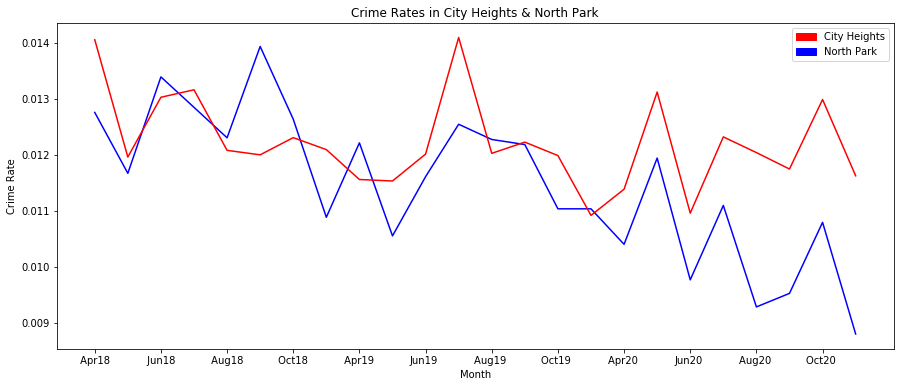

In [156]:
plt.figure(figsize=(15,6))
plt.plot(month_list, prop_NP_list,color='blue')
plt.plot(month_list,prop_CH_list,color='red')

plt.xlabel("Month")
plt.ylabel("Crime Rate")
plt.title("Crime Rates in City Heights & North Park")

red_patch = mpatches.Patch(color='red', label='City Heights')
blue_patch = mpatches.Patch(color='blue', label='North Park')
plt.legend(handles=[red_patch,blue_patch])
plt.xticks([' Apr18 ',' Jun18 ',' Aug18 ',' Oct18 ',' Apr19 ','Jun19 ','Aug19 ','Oct19 ','Apr20 ','Jun20 ','Aug20 ','Oct20 '])

From the graph above we notice a common trend between the rates of crimes. 

Next, Lets examine City Heights and North Park when compared to the other 5 Neighborhoods.

([<matplotlib.axis.XTick at 0x2ebcc6de108>,
 <a list of 12 Text xticklabel objects>)

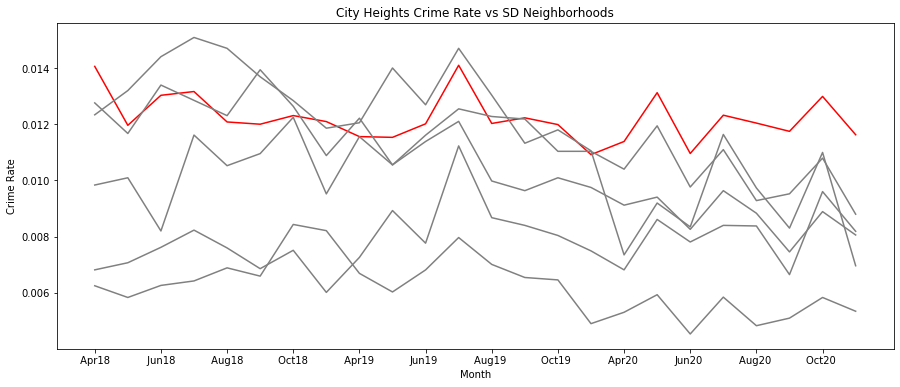

In [146]:
plt.figure(figsize=(15,6))
plt.plot(month_list, prop_CH_list,color='red')

plt.plot(month_list,prop_NP_list,color='gray')
plt.plot(month_list,prop_PB_list,color='gray')
plt.plot(month_list,prop_HC_list,color='gray')
plt.plot(month_list,prop_EN_list,color='gray')
plt.plot(month_list,prop_CM_list,color='gray')
plt.xlabel("Month")
plt.ylabel("Crime Rate")
plt.title("City Heights Crime Rate vs SD Neighborhoods")
plt.xticks([' Apr18 ',' Jun18 ',' Aug18 ',' Oct18 ',' Apr19 ','Jun19 ','Aug19 ','Oct19 ','Apr20 ','Jun20 ','Aug20 ','Oct20 '])

([<matplotlib.axis.XTick at 0x2ebcc6ce848>,
 <a list of 12 Text xticklabel objects>)

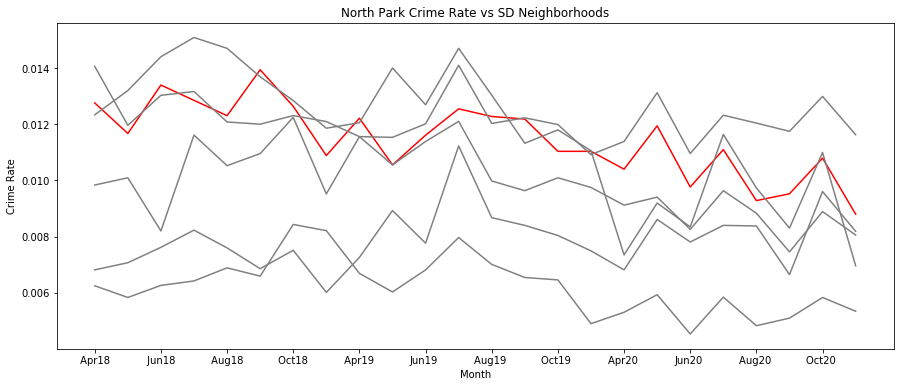

In [147]:
plt.figure(figsize=(15,6))
plt.plot(month_list, prop_NP_list,color='red')

plt.plot(month_list,prop_CH_list,color='gray')
plt.plot(month_list,prop_PB_list,color='gray')
plt.plot(month_list,prop_HC_list,color='gray')
plt.plot(month_list,prop_EN_list,color='gray')
plt.plot(month_list,prop_CM_list,color='gray')
plt.xlabel("Month")
plt.ylabel("Crime Rate")
plt.title("North Park Crime Rate vs SD Neighborhoods")
plt.xticks([' Apr18 ',' Jun18 ',' Aug18 ',' Oct18 ',' Apr19 ','Jun19 ','Aug19 ','Oct19 ','Apr20 ','Jun20 ','Aug20 ','Oct20 '])

From the two graphs above, while we see a slight decline in crime rate in North Park, City Heights shows no sizeable decline in crime rate over time. It seems there might be other factors at play here that are more impactful than the curfew. 

Let's check out and see just how many crimes near parks make up those that are reported to the police.

In [128]:
df_CHNP_bypark = df_bypark[(df_bypark['Neighborhood'] == "City Heights") | (df_bypark['Neighborhood'] == "North Park")]

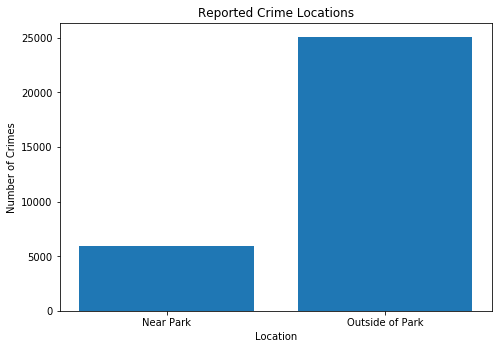

In [132]:
No,Yes = df_CHNP_bypark['By Park'].value_counts()

fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
x = ['Near Park', 'Outside of Park']
y = [Yes,No]
ax.bar(x,y)
plt.title("Reported Crime Locations")
plt.ylabel('Number of Crimes')
plt.xlabel("Location")
plt.show()

From our plot, we can see that the crimes near the parks make up a small percentage of the total reported crimes. From the data, we see that around every 1 in 5 crimes are reported by these parks. Let's instead observe the surrounding of the parks themselves to get a closer look. We graph the number of crimes occurred on streets bordering the affected parks for each year. 

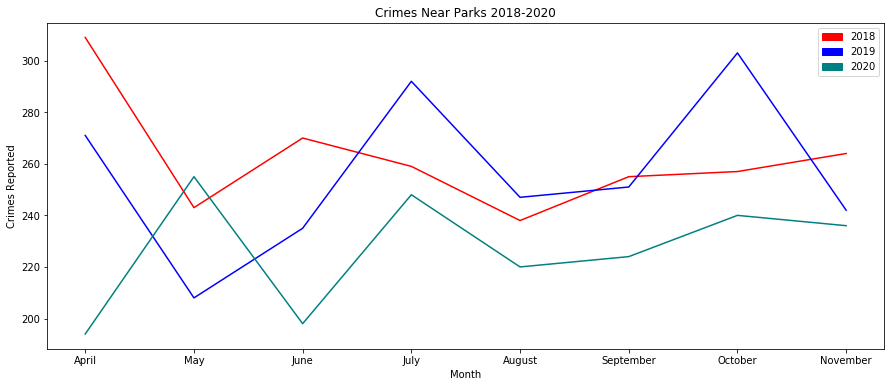

In [117]:
plt.figure(figsize=(15,6))
plt.plot(month_list_yr, park_18,color = "red")
plt.plot(month_list_yr, park_19,color = 'blue')
plt.plot(month_list_yr, park_20,color = 'teal')
plt.xlabel("Month")
plt.ylabel("Crimes Reported")
plt.title("Crimes Near Parks 2018-2020")

eight_patch = mpatches.Patch(color='red', label='2018')
ninth_patch = mpatches.Patch(color='blue', label='2019')
twny_patch = mpatches.Patch(color='teal', label='2020')
plt.legend(handles=[eight_patch,ninth_patch,twny_patch])

It's worth noting from this graph that while crimes after the initial months of the curfew went down, they began to rise again near levels of crime before the curfew was instated. This leads us to question now whether or not the curfew is making a statistically significant impact on crime rates. We will conduct further analysis by using chi squared testing to test the association between the curfew and crimes committed. We will comapre between the years 2018 in which there was no curfew and 2019 when there was. We elect to leave out 2020 in this portion purely because there was a mandatory shutdown for parks and recreation due to COVID-19.

# Data Analysis & Results

We now will test to see the association between the regions with curfews and the rate of crime across neighborhoods of San Diego. In order to do so, we will use a Chi Squared Test and determine if a difference is significant with a value of 0.05. We will start broad and narrow down our analysis to see if we can obtain more accurate results.

In [22]:
def chi_test(freq_1,freq_2):
        stat, p_value = chisquare([freq_1,freq_2])
        if p_value > 0.05:
            print('No difference found in the number of crimes committed',
                  'Unable to reject null hypothesis based on the p-value:',p_value)
        else:
            print('Difference found in the number of crimes committed',
                'Reject the null hypothesis based on the p-value:', p_value)

First we test the San Diego region overall in terms of crime for 2018 and 2019. Then we check 2019 and 2020.  

In [23]:
sd_month_crimes_18 = df_18['Month'].value_counts()
sd_month_crimes_19 = df_19['Month'].value_counts()
sd_month_crimes_20 = df_20['Month'].value_counts()

for x in range(0,9):
    chi_test(sd_month_crimes_18[x],sd_month_crimes_19[x])

Difference found in the number of crimes committed Reject the null hypothesis based on the p-value: 2.1653548982499572e-09
No difference found in the number of crimes committed Unable to reject null hypothesis based on the p-value: 0.50105790934678
No difference found in the number of crimes committed Unable to reject null hypothesis based on the p-value: 0.6430173065554046
No difference found in the number of crimes committed Unable to reject null hypothesis based on the p-value: 0.9013669987773348
No difference found in the number of crimes committed Unable to reject null hypothesis based on the p-value: 0.6236237249930414
No difference found in the number of crimes committed Unable to reject null hypothesis based on the p-value: 0.2024815706639452
No difference found in the number of crimes committed Unable to reject null hypothesis based on the p-value: 0.6766999372555382
No difference found in the number of crimes committed Unable to reject null hypothesis based on the p-value: 0.

In [24]:
for x in range(0,9):
    chi_test(sd_month_crimes_19[x],sd_month_crimes_20[x])

Difference found in the number of crimes committed Reject the null hypothesis based on the p-value: 3.734681576759159e-18
Difference found in the number of crimes committed Reject the null hypothesis based on the p-value: 0.00038153555092295186
No difference found in the number of crimes committed Unable to reject null hypothesis based on the p-value: 0.4057383578794135
No difference found in the number of crimes committed Unable to reject null hypothesis based on the p-value: 0.47493123106009705
Difference found in the number of crimes committed Reject the null hypothesis based on the p-value: 3.907826089558839e-08
Difference found in the number of crimes committed Reject the null hypothesis based on the p-value: 1.9628810986556686e-17
Difference found in the number of crimes committed Reject the null hypothesis based on the p-value: 6.861493636624478e-32
Difference found in the number of crimes committed Reject the null hypothesis based on the p-value: 1.1427616514513083e-06
Differen

We find from our test that there was a significant difference found in March between 2018 and 2019, which is the month in 2019 that the curfew was put into place. However, each month after showed no substantial difference which shows there is either very little or no association with the curfew and crime. Something else to note is there appears to be a substantial difference between 2019 and 2020. However, it is very likely that COVID-19 is a confounding variable here which may have tipped the crime higher or lower depending on location. From this observation, I will be leaving out 2020's data as the results are not reflective of the previous years of 2018 and 2019.

In order to get a solid answer for our analysis between 2018 and 2019, we pursue further and focus down on specific locations. Next we will look at City Heights and North Park, with their crime rates in each month from March to November in 2018 and 2019. 

In [25]:
#Perform Chi Squared Test on City Heights before the curfew and after the curfew.
for x in range(0,9):
    chi_test(prop_CH_18_list[x],prop_CH_19_list[x])

No difference found in the number of crimes committed Unable to reject null hypothesis based on the p-value: 0.9979010544193191
No difference found in the number of crimes committed Unable to reject null hypothesis based on the p-value: 0.9875440350823468
No difference found in the number of crimes committed Unable to reject null hypothesis based on the p-value: 0.9977741061609819
No difference found in the number of crimes committed Unable to reject null hypothesis based on the p-value: 0.9948797603784374
No difference found in the number of crimes committed Unable to reject null hypothesis based on the p-value: 0.9954799306188366
No difference found in the number of crimes committed Unable to reject null hypothesis based on the p-value: 0.9997253331897964
No difference found in the number of crimes committed Unable to reject null hypothesis based on the p-value: 0.998835567460851
No difference found in the number of crimes committed Unable to reject null hypothesis based on the p-val

In [26]:
#Perform Chi Squared Test on North Park crime rate before curfew and after the curfew
for x in range(0,9):
    chi_test(prop_NP_18_list[x],prop_NP_19_list[x])

No difference found in the number of crimes committed Unable to reject null hypothesis based on the p-value: 0.9890836906415674
No difference found in the number of crimes committed Unable to reject null hypothesis based on the p-value: 0.9972525337260518
No difference found in the number of crimes committed Unable to reject null hypothesis based on the p-value: 0.9940130624782574
No difference found in the number of crimes committed Unable to reject null hypothesis based on the p-value: 0.9910000355510163
No difference found in the number of crimes committed Unable to reject null hypothesis based on the p-value: 0.9984864009609759
No difference found in the number of crimes committed Unable to reject null hypothesis based on the p-value: 0.9998461471763086
No difference found in the number of crimes committed Unable to reject null hypothesis based on the p-value: 0.9913440776852447
No difference found in the number of crimes committed Unable to reject null hypothesis based on the p-va

From our tests, we can't conclude that there is a significant difference in the crimes between the two years for either neighborhood. From this point we can get an idea of the impact of the curfew, but I'd like to continue and take one step further to see if a more detailed approach will result in different results. I will now test the crimes that took place within the surrounding streets of each park that was given a curfew in 2019. This will give us a more accurate depiction of the impact of the curfew, as it is only concerning the areas nearby the parks themselves.

In [27]:
for x in range(0,9):
    chi_test(park_18[x],park_19[x])

No difference found in the number of crimes committed Unable to reject null hypothesis based on the p-value: 0.34523107177184
No difference found in the number of crimes committed Unable to reject null hypothesis based on the p-value: 0.11459683003899199
No difference found in the number of crimes committed Unable to reject null hypothesis based on the p-value: 0.09933510011871485
No difference found in the number of crimes committed Unable to reject null hypothesis based on the p-value: 0.11935667021099847
No difference found in the number of crimes committed Unable to reject null hypothesis based on the p-value: 0.15976948337751873
No difference found in the number of crimes committed Unable to reject null hypothesis based on the p-value: 0.6827826244678044
No difference found in the number of crimes committed Unable to reject null hypothesis based on the p-value: 0.8588630128278887
No difference found in the number of crimes committed Unable to reject null hypothesis based on the p-

From our Chi Squared tests, above we see that for each month from March to November in 2018 and 2019 there are no substantial differences! Since this is the most direct comparison we can make in this case, we can now conclude that there is no association between curfews on parks and the crime rate around them. 


# Ethics & Privacy

When cleaning the data set, I left out the primary address and address number to remove any logs that could identify specific locations such as residences. Since road names can extend to a larger area, I did not remove any road or intersecting road information. Additionally, I left in date and time since these elements were vital to our analysis as we compared the effects of park curfews. 

For my analysis, I only used data from one city in Southern California. There can definetely be different results from other areas in the United States especially outside of California, so our results here most certainly cannot be generalized. Furthermore, the parks analyzed were all near the same region in San Diego. This can potentially cause bias in our results since we do not have adequate representation of parks in regions of San Diego with different socio-economic status. It is extremely important that we take note of this, since in lower income areas there can be a larger population of homeless individuals that live near parks and with biased analysis we could end up unintentionally criminalizing homelessness in San Diego.

# Conclusion & Discussion

From my findings, I can conclude that in San Diego, the curfews placed on the parks in North Park and City Heights were not effective in reducing crime. Thus showing that my hypothesis that the curfews would make a difference incorrect.

Some limitations I had was that the parks I analyzed that were given a curfew do not make up a majority of the parks in San Diego. Due to this, our small sample size from our data is a limiting factor that can create bias. When I realized how small the sample size was, I opted to examine the park locations directly for more accurate representation.I believe that if there were more parks that were given curfews and we had longer timeline, we would have recieved more accurate results. Additionally, the curfews placed on the parks were not all the same. City Heights Mini Park was given a different curfew time than the other parks which can also skew the data, since the curfews that start later may not be as effective.

We also saw the effects of COVID-19 on the crimes near parks, with a drastic decrease in crime rate for a majority of the months from April through November. I believe this likely in part caused by the lockdowns earlier this year and the effects of the pandemic on the public, causing many to avoid public areas such as parks. This led us to only include data from 2018 and 2019, as the data from 2020 in my opinion are not accurate representations given the extreme circumstances of a pandemic. 

